<a href="https://colab.research.google.com/github/douglassesi/MachineLearning/blob/main/Clustering/C%C3%ADrculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objetivo

Utilizando dataset do arquivo circulos.csv testaremos a clusterização utilizando k-means e DBSCAN.

1. Qual é a melhor quantidade de Clusters?
2. Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?


#Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import os

#Carregando o dataset

In [2]:
!git clone https://github.com/douglassesi/MachineLearning

Cloning into 'MachineLearning'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 123 (delta 44), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (123/123), 408.60 KiB | 2.21 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [3]:
os.chdir("/content/MachineLearning/Clustering/src")

In [4]:
df_circulos =  pd.read_csv('Circulos.csv',encoding="UTF-8", sep=",")

In [5]:
df_circulos.describe()

,Unnamed: 0,X,Y
count,1500.000000,1500.000000,1500.000000
mean,749.500000,-0.000587,0.001474
std,433.157015,0.559950,0.560877
min,0.000000,-1.116100,-1.087399
25%,374.750000,-0.436690,-0.438517
50%,749.500000,-0.009070,-0.004835
75%,1124.250000,0.437952,0.444587
max,1499.000000,1.108098,1.080646


In [6]:
df_circulos.head()

,Unnamed: 0,X,Y
0,0,-0.262199,0.456958
1,1,-0.955271,-0.377646
2,2,0.119759,1.004204
3,3,-0.817525,-0.636813
4,4,0.341931,0.408966


In [7]:
df_circulos_kmeans = df_circulos[["X","Y"]]

#Encontrando a melhor quantidade de clusters para o modelo

In [8]:
inertias =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter=100).fit(df_circulos_kmeans)    
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)

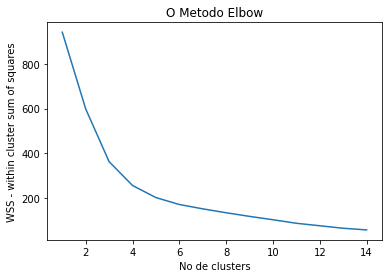

In [9]:
plt.figure(1)
plt.plot(range(1,15),inertias)
plt.title('O Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

Vamos tentar utilizar 4 clusters para esse caso.

#Trabalhando com K-Means


##Preparação

In [10]:
kmeans4 = KMeans(n_clusters=4) #quantidade de clusters para simular

##Aplicação

In [11]:
kmeans4.fit(df_circulos_kmeans) #aplicação do kmeans no dataset

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
df_circulos_kmeans["cluster"] = kmeans4.labels_ #inclusão dos clusters determinados no dataset

##Plotagem da clusterização - Kmeans

Text(0.5, 1.0, 'K-Means - circulos')

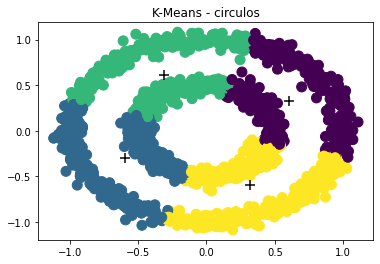

In [13]:
plt.scatter(df_circulos_kmeans.X,df_circulos_kmeans.Y,c=df_circulos_kmeans.cluster, s=100)
plt.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],s=100,c='black',label="Centroids",marker='+')
plt.title("K-Means - circulos")


#Tralhando com DBSCAN

##Preparação

In [14]:
df_circulos_dbscan = df_circulos[["X","Y"]]

##Normalização dos dados

In [15]:
SS = StandardScaler().fit_transform(df_circulos_dbscan)

##Aplicação DBSCAN

In [16]:
db = DBSCAN(eps=0.23,min_samples=5).fit(SS)
print(db.labels_)

[0 1 1 ... 0 0 0]


##Plotagem da clusterização - DBSCAN

In [17]:
df_circulos_dbscan['cluster'] = db.labels_ #inclusão do número do cluster no dataset

Text(0, 0.5, 'Quantidades')

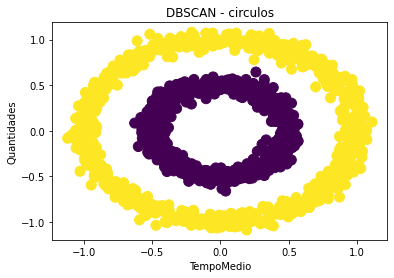

In [19]:
plt.scatter(df_circulos_dbscan.X,df_circulos_dbscan.Y, c=df_circulos_dbscan.cluster, s=100)
plt.title("DBSCAN - circulos")
plt.xlabel('TempoMedio')
plt.ylabel('Quantidades')

Apesar da análise de cluster sugerir 4, quando comparamos os resultados de KMEANS e DBSCAN, vemos uma clusterização mais aderente ao problema no DBSCAN utilizando 2 clusters.

#Respostas



1. Qual é a melhor quantidade de Clusters?
    **2**
2. Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa clusterização?
    **DBSCAN**